<div style="float:left">
    <h1>Final Project-Education-MA</h1>
</div>
<div style="float:right">
    <p style="line-height:10px"> 6105 Data Science Final Project Presentation - [Education Theme] </p>
    <p style="line-height:10px"> Analysis part 2(MA Dataset) - [Version 2.0] </p>
    <p style="line-height:10px"> Group: BostonWolfPack </p>
</div>

# Menu
1. <a href="#1.All-states-Data">All states Data</a>  
    <a href="#Cluster-of-Students">Cluster of Students</a>  
2. <a href="#2.MA-Data">MA Data</a>   
    2.1 <a href="#2.1-Read-Data-from-Files">Read Data from Files</a>   
    2.2 <a href="#2.2-Data-Cleaning">Data Cleaning</a>   
    2.3 <a href="#2.3-Data-Correlation-Test">Data Correlation Test</a>   
    2.4 <a href="#2.4-Data-Visualization">Data Visualization</a>   
    2.5 <a href="#2.5-Function-encapsulation">Function encapsulation</a>   
    2.6 <a href="#2.6-Some-trials">Some trials</a>   
    2.7 <a href="#2.7-Data-Handling">Data Handling</a>   
    2.8 <a href="#2.8-Relationship-between-student-achievement-index-and-education-quality">Relationship between student achievement index and education quality</a>   
        linear regression & polynomial regression & logistic regression 
        conx artifical neuron network - Regression  
        Random Forest
    2.9 <a href="#2.9-Relationship-between-student-achievement-index-and-ExpenditurePerPupil">Relationship between student achievement index and ExpenditurePerPupil</a>  
        linear regression & non-linear regression & polynomial regression   
        Keras Neuron Network - Regression  
        Random forest

Steps: data cleaning->data visualization->Models->Prediction/Conclusion

In [1]:
# basic libs
import os
import math
import pandas as pd
pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('max_colwidth',100)
import numpy as np
from itertools import product
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

# scipy
# data test
from scipy.stats import spearmanr,kendalltau,pearsonr

# sklearn
# data handling
from sklearn.preprocessing import StandardScaler,MinMaxScaler
# cluster
from sklearn.cluster import KMeans
# linear algebra
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
# random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Neural Network
# conx
import conx as cx
from tensorflow.keras.models import model_from_json
# tensorflow/keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

Using TensorFlow backend.
ConX, version 3.7.10


## 1.All states Data

In [2]:
file_list = ['enroll_states.csv', 'finance_states.csv', 'naep_states.csv', 'states_all.csv', 'states_all_extended.csv']

In [3]:
# enroll
enroll = pd.read_csv(os.path.join('data',file_list[0]))
# finance
finance = pd.read_csv(os.path.join('data',file_list[1]))
# naep
naep = pd.read_csv(os.path.join('data',file_list[2]))
# states all
states_all = pd.read_csv(os.path.join('data',file_list[3]))
# states all extend
states_all_ext = pd.read_csv(os.path.join('data',file_list[4]))

### Cluster of Students

#### Data cleaning
Dataset: states_all  

In [4]:
cols = ['PRIMARY_KEY','STATE','TOTAL_REVENUE','AVG_MATH_4_SCORE','AVG_MATH_8_SCORE','AVG_READING_4_SCORE','AVG_READING_8_SCORE']
states1 = states_all[cols]
states1.head()

,PRIMARY_KEY,STATE,TOTAL_REVENUE,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,2678885.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1049591.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,3258079.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1711959.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,26260025.0,208.398961,260.892247,196.764414,NaN


In [5]:
# delete data before 1992 and data after 2016
states2 = states1.iloc[0:1275]
# use preceding values to fill NaN
states3 = states2.fillna(method='ffill')
# use back values to fill NaN
states4 = states3.fillna(method='bfill')
states4.head()

,PRIMARY_KEY,STATE,TOTAL_REVENUE,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,2678885.0,208.327876,252.187522,207.963517,258.859712
1,1992_ALASKA,ALASKA,1049591.0,208.327876,252.187522,207.963517,258.859712
2,1992_ARIZONA,ARIZONA,3258079.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1711959.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,26260025.0,208.398961,260.892247,196.764414,264.619665


In [6]:
# sum of all 4 scores
states4['SUM_SCORE'] = states4[['AVG_MATH_4_SCORE','AVG_MATH_8_SCORE','AVG_READING_4_SCORE','AVG_READING_8_SCORE']].apply(lambda x: x.sum(), axis=1)
cols2 = ['PRIMARY_KEY','STATE','TOTAL_REVENUE','SUM_SCORE']
states5 = states4[cols2]
states6 = np.array(states5[['TOTAL_REVENUE','SUM_SCORE']])
states6[:5]

array([[2.67888500e+06, 9.27338628e+02],
       [1.04959100e+06, 9.27338628e+02],
       [3.25807900e+06, 9.49002820e+02],
       [1.71195900e+06, 9.39772242e+02],
       [2.62600250e+07, 9.30675287e+02]])

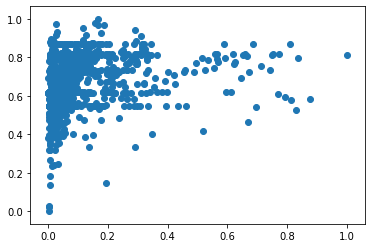

In [7]:
# normalization
min_max_scaler = MinMaxScaler()
states7 = min_max_scaler.fit_transform(states6)

plt.scatter(states7[:, 0], states7[:, 1], marker='o')

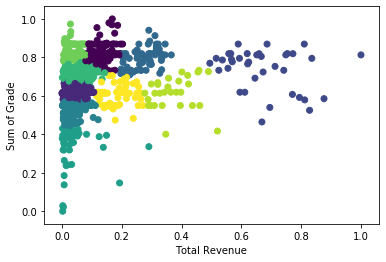

In [8]:
n = 10
cls = KMeans(n_clusters=n)
y_pred = cls.fit_predict(states7)
plt.scatter(states7[:, 0], states7[:, 1], c=y_pred)
plt.xlabel("Total Revenue")
plt.ylabel("Sum of Grade")
plt.show()

In [9]:
center = cls.cluster_centers_
labels = cls.labels_

# num of each cluster
print("Num of each cluster:",end='')
for i in range(n):
    print(len(states6[labels==i]),end=' ')
print()

meanlist_i = []
meanlist_g = []
# grade mean and std
for i in range(2):
    for j in range(n):
        mean = states7[labels==j][:,i].mean()
        std = states7[labels==j][:,i].std()
        if i==0:
            meanlist_i.append(mean)
            print("Invest--Mean: {:<20}, Std: {:<20}".format(mean,std))
        if i==1:
            meanlist_g.append(mean)
            print("Grade --Mean: {:<20}, Std: {:<20}".format(mean,std))

Num of each cluster:141 295 37 74 198 42 184 187 29 88 
Invest--Mean: 0.12734356957949322 , Std: 0.030509046927950104
Invest--Mean: 0.03587221081227483 , Std: 0.027041527565561753
Invest--Mean: 0.6740977239787896  , Std: 0.11400248392478136 
Invest--Mean: 0.2691495221456874  , Std: 0.044549044572101286
Invest--Mean: 0.03750928524321373 , Std: 0.02825995132110127 
Invest--Mean: 0.041354302923749114, Std: 0.05763723258086313 
Invest--Mean: 0.051095903401487064, Std: 0.03546609199768701 
Invest--Mean: 0.031282804186872015, Std: 0.020281546646185162
Invest--Mean: 0.3713316308844757  , Std: 0.06491576584396919 
Invest--Mean: 0.176018249392473   , Std: 0.042402798951219095
Grade --Mean: 0.8232282899759541  , Std: 0.045607509975637686
Grade --Mean: 0.6184036828135685  , Std: 0.015115024858101345
Grade --Mean: 0.7385101481992543  , Std: 0.10523802627731096 
Grade --Mean: 0.7908707236909617  , Std: 0.05282793518082597 
Grade --Mean: 0.5381552209976538  , Std: 0.030026457862170078
Grade --Mean: 

[(0.031282804186872015, 0.823406988555421), (0.03587221081227483, 0.6184036828135685), (0.03750928524321373, 0.5381552209976538), (0.041354302923749114, 0.32683520453095444), (0.051095903401487064, 0.7247769223782852), (0.12734356957949322, 0.8232282899759541), (0.176018249392473, 0.6005761748796528), (0.2691495221456874, 0.7908707236909617), (0.3713316308844757, 0.6152422799377474), (0.6740977239787896, 0.7385101481992543)]


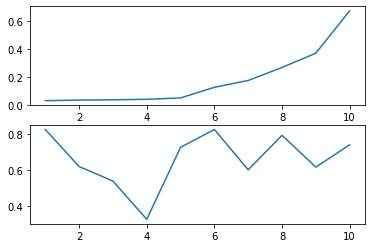

In [10]:
meanlist = list(zip(meanlist_i,meanlist_g))
meanlist_sort = sorted(meanlist,key=lambda x:x[0])
print(meanlist_sort)
meanlist_ii = [i[0] for i in meanlist_sort]
meanlist_gg = [i[1] for i in meanlist_sort]
plt.subplot(211)
plt.plot(range(1,11),meanlist_ii)
plt.subplot(212)
plt.plot(range(1,11),meanlist_gg)

However, Result is that investment has nothing to do with grades

## 2.MA Data
### 2.1 Read Data from Files

In [11]:
filename_list = ['gradrates', 'PerPupilExpenditures', 'plansforhsgrad', 'teacherdata', 'TeacherSalaries']

In [12]:
def vstack_data(total,data):
    if len(total)==0:
        total = data
    else:
        total = np.vstack((total,data))
    return total

In [13]:
# preprocessing data
gradrates_data = []
PerPupilExpenditures_data = []
plansforhsgrad_data = []
teacherdata_data = []
TeacherSalaries_data = []

header = []
for k in range(len(filename_list)):
    for i in range(1,11):
        # read file
        data_xlsx = pd.read_excel(os.path.join('data_MA',filename_list[k]+' ('+str(i)+').xlsx'),header=1)
        # delete original total row
        filterr = data_xlsx['District Name']
        data_xlsx = data_xlsx[(filterr!='State Totals') & (filterr!='State')]
        # time column
        data_xlsx['time']= 2018-i
        # header 
        header = data_xlsx.columns
        # add all file together (vstack)
        if k==0:
            gradrates_data = vstack_data(gradrates_data,data_xlsx)
        elif k==1:
            PerPupilExpenditures_data = vstack_data(PerPupilExpenditures_data,data_xlsx)
        elif k==2:
            plansforhsgrad_data = vstack_data(plansforhsgrad_data,data_xlsx)
        elif k==3:
            teacherdata_data = vstack_data(teacherdata_data,data_xlsx)
        elif k==4:
            TeacherSalaries_data = vstack_data(TeacherSalaries_data,data_xlsx)
    if k==0:
        gradrates_data = pd.DataFrame(gradrates_data,columns=header)
    elif k==1:
        PerPupilExpenditures_data = pd.DataFrame(PerPupilExpenditures_data,columns=header)
    elif k==2:
        plansforhsgrad_data = pd.DataFrame(plansforhsgrad_data,columns=header)
    elif k==3:
        teacherdata_data = pd.DataFrame(teacherdata_data,columns=header)
    elif k==4:
        TeacherSalaries_data = pd.DataFrame(TeacherSalaries_data,columns=header)

In [14]:
gradrates_data.head()

,District Name,District Code,# in Cohort,% Graduated,% Still in School,% Non-Grad Completers,% H.S. Equiv.,% Dropped Out,% Permanently Excluded,time
0,Abby Kelley Foster Charter Public (District),4450000,82,97.6,0,0,1.2,1.2,0,2017
1,Abington,10000,100,95,2,0,0,3,0,2017
2,Academy Of the Pacific Rim Charter Public (Dis...,4120000,47,93.6,2.1,0,2.1,2.1,0,2017
3,Acton-Boxborough,6000000,477,95.8,2.5,0,0,1.7,0,2017
4,Adams-Cheshire,6030000,78,79.5,15.4,0,0,5.1,0,2017


In [15]:
PerPupilExpenditures_data.head()

,District Name,District Code,In-District Expenditures,Total In-district FTEs,In-District Expenditures per Pupil,Total Expenditures,Total Pupil FTEs,Total Expenditures per Pupil,Unnamed: 8,time
0,Abby Kelley Foster Charter Public (District),4450000,"$17,867,690.22","1,424.9","$12,539.48","$17,867,690.22","1,424.9","$12,539.48",NaN,2017
1,Abington,10000,"$25,908,215.00","1,926.2","$13,450.43","$29,737,218.00","2,040.5","$14,573.50",NaN,2017
2,Academy Of the Pacific Rim Charter Public (Dis...,4120000,"$9,536,647.00",520.2,"$18,333.50","$9,536,647.00",520.2,"$18,333.50",NaN,2017
3,Acton-Boxborough,6000000,"$78,051,554.00","5,613.9","$13,903.27","$87,351,122.00","5,747.5","$15,198.11",NaN,2017
4,Acushnet,30000,"$12,132,993.00",973.1,"$12,468.39","$15,868,705.00","1,279.9","$12,398.39",NaN,2017


In [16]:
plansforhsgrad_data.head()

,District Name,District Code,4 Year Private College,4 Year Public College,2 Year Private College,2 Year Public College,Other Post Secondary,Apprenticeship,Work,Military,Other,Unknown,Total Count,time
0,Abby Kelley Foster Charter Public (District),4450000,30,48.9,0,16.7,2.2,0,0,1.1,1.1,0,90,2017
1,Abington,10000,25.2,39.8,0,12.2,0.8,3.3,8.9,8.1,0,1.6,123,2017
2,Academy Of the Pacific Rim Charter Public (Dis...,4120000,40.5,56.8,0,0,2.7,0,0,0,0,0,37,2017
3,Acton-Boxborough,6000000,44,45.3,0.2,7.3,0.7,0,0.9,0,1.1,0.4,450,2017
4,Acushnet,30000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2017


In [17]:
teacherdata_data.head()

,District Name,District Code,Total # of Teachers,% of Teachers Licensed in Teaching Assignment,Total # of Classes in Core Academic Areas,% of Core Academic Classes Taught by Teachers Who are Highly Qualified,Student / Teacher Ratio,time
0,Abby Kelley Foster Charter Public (District),4450000,109.0,97.8,83.7,81.1,13.1 to 1,2017
1,Abington,10000,123.5,100,93.6,81.1,16.5 to 1,2017
2,Academy Of the Pacific Rim Charter Public (Dis...,4120000,48.1,70.5,79.7,39.7,10.9 to 1,2017
3,Acton-Boxborough,6000000,371.8,100,97.5,88.9,15.1 to 1,2017
4,Acushnet,30000,65.5,100,98.5,91.2,14.7 to 1,2017


In [18]:
TeacherSalaries_data.head()

,District Name,District Code,Salary Totals,Average Salary,FTE Count,time
0,Abington,10000,"$10,610,746","$85,917",124,2017
1,Acton-Boxborough,6000000,"$31,536,769","$84,822",372,2017
2,Acushnet,30000,"$5,098,533","$76,860",66,2017
3,Adams-Cheshire,6030000,"$6,775,396","$82,426",82,2017
4,Agawam,50000,"$24,109,895","$74,116",325,2017


### 2.2 Data Cleaning

#### All columns comprehension

In [19]:
print(gradrates_data.columns)
# 100% = '% Graduated'+'% Still in School'+'% Non-Grad Completers'+'% H.S. Equiv.'+'% Dropped Out'+'% Permanently Excluded'
# Selected Columns-> '% Graduated'

print(PerPupilExpenditures_data.columns)
# 'Total Expenditures per Pupil'       = 'Total Expenditures' / 'Total Pupil FTEs'
# 'In-District Expenditures per Pupil' = 'In-District Expenditures' / 'Total In-district FTEs'
# Selected Columns-> 'Total Expenditures per Pupil'

print(plansforhsgrad_data.columns)
# 'Total Count' = '4 Year Private College'+'4 Year Public College'+'2 Year Private College'
#                 +'2 Year Public College'+'Other Post Secondary'+'Apprenticeship'+'Work'+'Military'+'Other'+'Unknown'
# Selected Columns-> '% goodGrad' = (1-'Other'-'Unknown') / 'Total Count'

print(teacherdata_data.columns)
# teachers quantity:     'Total # of Teachers'
# licensed teachers(%):  '% of Teachers Licensed in Teaching Assignment'
# core classes:          'Total # of Classes in Core Academic Areas'
# coreC & goodT(%):      '% of Core Academic Classes Taught by Teachers Who are Highly Qualified'
# S/T ratio:             'Student / Teacher Ratio'
# Selected Columns-> '% of Teachers Licensed in Teaching Assignment' & 'Student / Teacher Ratio' & 'Total # of Teachers'

print(TeacherSalaries_data.columns)
# 'Salary Totals' = 'Average Salary'*'FTE Count'
# Selected Columns-> 'Average Salary'

Index(['District Name', 'District Code', '# in Cohort', '% Graduated',
       '% Still in School', '% Non-Grad Completers', '% H.S. Equiv.',
       '% Dropped Out', '% Permanently Excluded', 'time'],
      dtype='object')
Index(['District Name', 'District Code', 'In-District Expenditures',
       'Total In-district FTEs', 'In-District Expenditures per Pupil',
       'Total Expenditures', 'Total Pupil FTEs',
       'Total Expenditures per Pupil', 'Unnamed: 8', 'time'],
      dtype='object')
Index(['District Name', 'District Code', '4 Year Private College',
       '4 Year Public College', '2 Year Private College',
       '2 Year Public College', 'Other Post Secondary', 'Apprenticeship',
       'Work', 'Military', 'Other', 'Unknown', 'Total Count', 'time'],
      dtype='object')
Index(['District Name', 'District Code', 'Total # of Teachers',
       '% of Teachers Licensed in Teaching Assignment',
       'Total # of Classes in Core Academic Areas',
       '% of Core Academic Classes Taught

#### Filter needed columns

In [20]:
# select columns
col_g = ['time','District Name','District Code','% Graduated']
gradrates_data1 = gradrates_data[col_g]
gradrates_data1.head()

,time,District Name,District Code,% Graduated
0,2017,Abby Kelley Foster Charter Public (District),4450000,97.6
1,2017,Abington,10000,95
2,2017,Academy Of the Pacific Rim Charter Public (Dis...,4120000,93.6
3,2017,Acton-Boxborough,6000000,95.8
4,2017,Adams-Cheshire,6030000,79.5


In [21]:
# select columns
col_p = ['time','District Name','District Code','Other','Unknown','Total Count']
plansforhsgrad_data1 = plansforhsgrad_data[col_p]
# drop NaN
plansforhsgrad_data2 = plansforhsgrad_data1.fillna(0)
# compute rate
top = (plansforhsgrad_data2['Other']+plansforhsgrad_data2['Unknown'])
bottom = pd.Series(map(float,map(lambda x:x.strip().replace(',',''),plansforhsgrad_data2['Total Count'])))
plansforhsgrad_data2['% goodGrad']  = 1-top/bottom
plansforhsgrad_data3 = plansforhsgrad_data2[['time','District Name','District Code','% goodGrad']]
plansforhsgrad_data3.head()

,time,District Name,District Code,% goodGrad
0,2017,Abby Kelley Foster Charter Public (District),4450000,0.987778
1,2017,Abington,10000,0.986992
2,2017,Academy Of the Pacific Rim Charter Public (Dis...,4120000,1.000000
3,2017,Acton-Boxborough,6000000,0.996667
4,2017,Acushnet,30000,1.000000


In [22]:
# select columns
col_t = ['time','District Name','District Code','Student / Teacher Ratio','Total # of Teachers',
         '% of Teachers Licensed in Teaching Assignment']
teacherdata_data['Student / Teacher Ratio'] = pd.Series(map(lambda x:float(str(x).replace(' to 1','').strip()) ,teacherdata_data['Student / Teacher Ratio']))
teacherdata_data['Total # of Teachers'] = pd.Series(map(lambda x:float(str(x).replace(',','').strip()) ,teacherdata_data['Total # of Teachers']))
teacherdata_data1 = teacherdata_data[col_t]
teacherdata_data1.head()

,time,District Name,District Code,Student / Teacher Ratio,Total # of Teachers,% of Teachers Licensed in Teaching Assignment
0,2017,Abby Kelley Foster Charter Public (District),4450000,13.1,109.0,97.8
1,2017,Abington,10000,16.5,123.5,100
2,2017,Academy Of the Pacific Rim Charter Public (Dis...,4120000,10.9,48.1,70.5
3,2017,Acton-Boxborough,6000000,15.1,371.8,100
4,2017,Acushnet,30000,14.7,65.5,100


In [23]:
# select columns
col_ts = ['time','District Code','Average Salary']
TeacherSalaries_data1 = TeacherSalaries_data[col_ts]
TeacherSalaries_data1['Average Salary'] = pd.Series(map(lambda x:int(x.replace('$','').replace(',','')),TeacherSalaries_data1['Average Salary']))
TeacherSalaries_data1.head()

E:\Softwares\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,time,District Code,Average Salary
0,2017,10000,85917
1,2017,6000000,84822
2,2017,30000,76860
3,2017,6030000,82426
4,2017,50000,74116


In [24]:
# select columns
col_pp = ['time','District Name','District Code','Total Expenditures per Pupil']
PerPupilExpenditures_data1 = PerPupilExpenditures_data[col_pp]
PerPupilExpenditures_data1['Total Expenditures per Pupil'] = pd.Series(map(lambda x:float(x.replace('$','').replace(',','')),PerPupilExpenditures_data1['Total Expenditures per Pupil']))
PerPupilExpenditures_data1.head()

E:\Softwares\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,time,District Name,District Code,Total Expenditures per Pupil
0,2017,Abby Kelley Foster Charter Public (District),4450000,12539.48
1,2017,Abington,10000,14573.50
2,2017,Academy Of the Pacific Rim Charter Public (Dis...,4120000,18333.50
3,2017,Acton-Boxborough,6000000,15198.11
4,2017,Acushnet,30000,12398.39


In [25]:
# join 5 datasets together
def merge2(d1,d2):
    return pd.merge(d1,d2)

synthesize_data = merge2(PerPupilExpenditures_data1,merge2(gradrates_data1,merge2(teacherdata_data1,merge2(plansforhsgrad_data3,TeacherSalaries_data1))))
synthesize_data1 = synthesize_data.dropna()
synthesize_data1.head()
synthesize_data1.shape

(2541, 10)

**Conclusion for Processed Datasets:**  
- Single files:  
*gradrates_data1*  
*teacherdata_data1*  
*plansforhsgrad_data3*  
*TeacherSalaries_data1*  
*PerPupilExpenditures_data1*  
- 5 in 1 file:  
*synthesize_data1*  

### 2.3 Data Correlation Test
spearmanr/kendalltau

In [26]:
# correlations
def corr(fname,data1,data2):
    if fname == 'spearmanr':
        coef, p = spearmanr(data1, data2)
        print('  Spearman correlation coefficient: %.3f' % coef)
    elif fname == 'kendalltau':
        coef, p = kendalltau(data1, data2)
        print('  Kendalltau correlation coefficient: %.3f' % coef)
    elif fname == 'pearsonr':
        coef, p = pearsonr(data1, data2)
        print('  Pearson correlation coefficient: %.3f' % coef)
    elif fname == 'all':
        corr('spearmanr',data1,data2)
        corr('kendalltau',data1,data2)
        return
    
    alpha = 0.05
    if p > alpha:
        print('      Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
    else:
        print('      Samples are correlated (reject H0) p=%.3f' % p)

In [27]:
# print("All columns:\n",synthesize_data1.columns)

# correlation test
print("1. Graduated--S/T Ratio")
corr('all',synthesize_data1['% Graduated'],synthesize_data1['Student / Teacher Ratio'])

print("2. Graduated--Licensed Teachers")
corr('all',synthesize_data1['% Graduated'],synthesize_data1['% of Teachers Licensed in Teaching Assignment'])

print("3. Graduated--Total Expenditures per pupil")
corr('all',synthesize_data1['% Graduated'],synthesize_data1[['Total Expenditures per Pupil']])

print("4. Graduated--Teacher quantity")
corr('all',synthesize_data1['% Graduated'],synthesize_data1[['Total # of Teachers']])

print("5. Graduated--Good graduate")
corr('all',synthesize_data1['% Graduated'],synthesize_data1[['% goodGrad']])

print("6. Graduated--Average Salary")
corr('all',synthesize_data1['% Graduated'],synthesize_data1[['Average Salary']])

1. Graduated--S/T Ratio
  Spearman correlation coefficient: -0.031
      Samples are uncorrelated (fail to reject H0) p=0.113
  Kendalltau correlation coefficient: -0.021
      Samples are uncorrelated (fail to reject H0) p=0.112
2. Graduated--Licensed Teachers
  Spearman correlation coefficient: 0.226
      Samples are correlated (reject H0) p=0.000
  Kendalltau correlation coefficient: 0.161
      Samples are correlated (reject H0) p=0.000
3. Graduated--Total Expenditures per pupil
  Spearman correlation coefficient: 0.161
      Samples are correlated (reject H0) p=0.000
  Kendalltau correlation coefficient: 0.105
      Samples are correlated (reject H0) p=0.000
4. Graduated--Teacher quantity
  Spearman correlation coefficient: -0.220
      Samples are correlated (reject H0) p=0.000
  Kendalltau correlation coefficient: -0.149
      Samples are correlated (reject H0) p=0.000
5. Graduated--Good graduate
  Spearman correlation coefficient: 0.201
      Samples are correlated (reject H0)

**Conclusion for correlation test:**  
- all columns except 'S/T Ratio' is correlated to 'graduated rate '

## 2.4 Data Visualization

(array([  1.,   3.,  18.,  23.,  45., 126., 203., 423., 830., 869.]),
 array([35.8, 42.22, 48.64, 55.059999999999995, 61.48, 67.9, 74.32, 80.74,
        87.16, 93.58, 100.0], dtype=object),
 <a list of 10 Patch objects>)

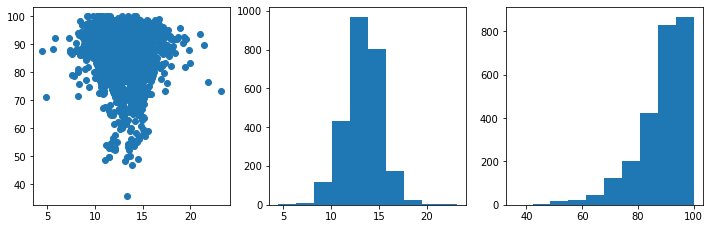

In [28]:
# X:Student / Teacher Ratio
# Y:Graduated Rate
plt.figure(figsize=(12,8))
plt.subplot(231)
plt.scatter(synthesize_data1['Student / Teacher Ratio'],synthesize_data1['% Graduated'])
plt.subplot(232)
plt.hist(synthesize_data1['Student / Teacher Ratio'])
plt.subplot(233)
plt.hist(synthesize_data1['% Graduated'])

(array([   2.,    2.,    8.,   12.,   24.,   45.,   76.,  152.,  435.,
        1785.]),
 array([84.4, 85.96000000000001, 87.52000000000001, 89.08, 90.64, 92.2,
        93.76, 95.32000000000001, 96.88, 98.44, 100.0], dtype=object),
 <a list of 10 Patch objects>)

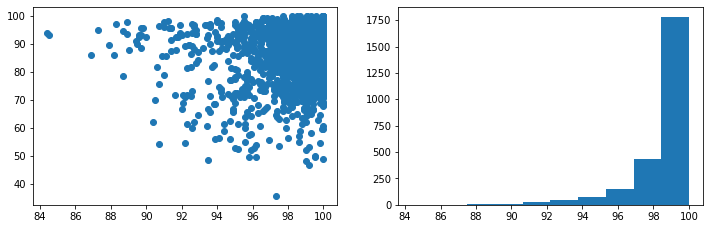

In [29]:
# X:Licensed Teachers
# Y:Graduated Rate
plt.figure(figsize=(12,8))
plt.subplot(221)
plt.scatter(synthesize_data1['% of Teachers Licensed in Teaching Assignment'],synthesize_data1['% Graduated'])
plt.subplot(222)
plt.hist(synthesize_data1['% of Teachers Licensed in Teaching Assignment'])

(array([2.650e+02, 1.095e+03, 6.620e+02, 2.970e+02, 1.460e+02, 3.900e+01,
        2.100e+01, 1.200e+01, 3.000e+00, 1.000e+00]),
 array([ 8242.66 , 10979.302, 13715.944, 16452.586, 19189.228, 21925.87 ,
        24662.512, 27399.154, 30135.796, 32872.438, 35609.08 ]),
 <a list of 10 Patch objects>)

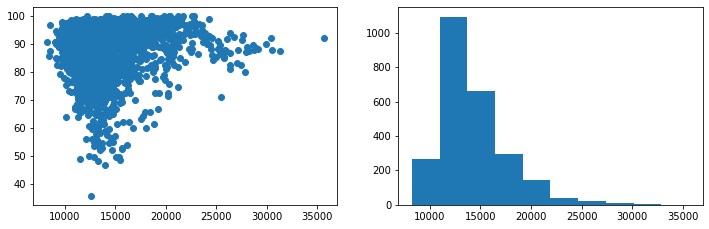

In [30]:
# X:Total Expenditures per Pupil
# Y:Graduated Rate
plt.figure(figsize=(12,8))
plt.subplot(221)
plt.scatter(synthesize_data1['Total Expenditures per Pupil'],synthesize_data1['% Graduated'])
plt.subplot(222)
plt.hist(synthesize_data1['Total Expenditures per Pupil'])

(array([ 31., 163., 456., 620., 580., 401., 167.,  78.,  29.,  16.]),
 array([ 50028. ,  55288.2,  60548.4,  65808.6,  71068.8,  76329. ,
         81589.2,  86849.4,  92109.6,  97369.8, 102630. ]),
 <a list of 10 Patch objects>)

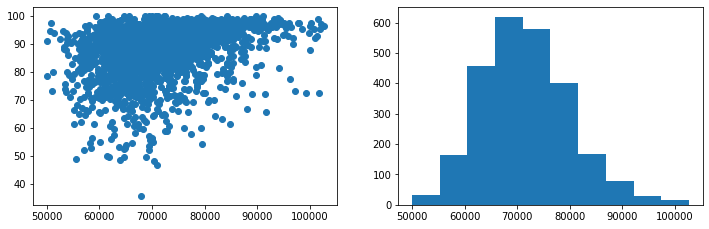

In [31]:
# X:Average Salary
# Y:Graduated Rate
plt.figure(figsize=(12,8))
plt.subplot(221)
plt.scatter(synthesize_data1['Average Salary'],synthesize_data1['% Graduated'])
plt.subplot(222)
plt.hist(synthesize_data1['Average Salary'])

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00,
        6.000e+00, 7.000e+00, 7.100e+01, 2.454e+03]),
 array([-0.171875 , -0.0546875,  0.0625   ,  0.1796875,  0.296875 ,
         0.4140625,  0.53125  ,  0.6484375,  0.765625 ,  0.8828125,
         1.       ]),
 <a list of 10 Patch objects>)

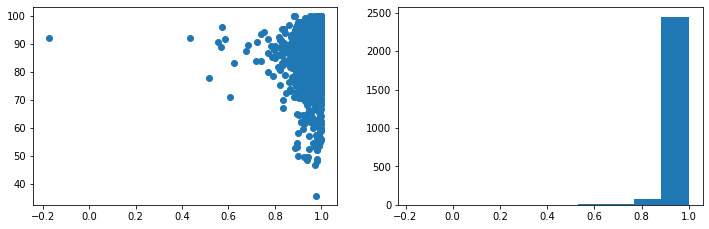

In [32]:
# X:Good graduate
# Y:Graduated Rate
plt.figure(figsize=(12,8))
plt.subplot(221)
plt.scatter(synthesize_data1['% goodGrad'],synthesize_data1['% Graduated'])
plt.subplot(222)
plt.hist(synthesize_data1['% goodGrad'])

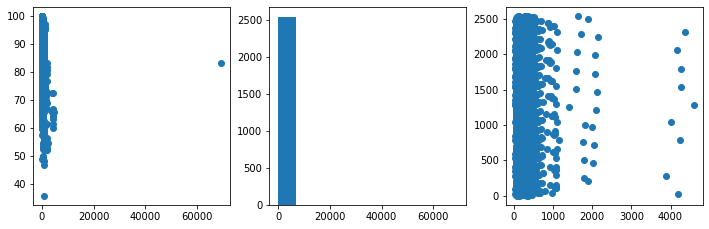

In [33]:
# X:Teacher quantity
# Y:Graduated Rate
plt.figure(figsize=(12,8))
plt.subplot(231)
plt.scatter(synthesize_data1['Total # of Teachers'],synthesize_data1['% Graduated'])
plt.subplot(232)
plt.hist(synthesize_data1['Total # of Teachers'])
# delete Outliers
synthesize_data1_test = synthesize_data1[synthesize_data1['Total # of Teachers']!=synthesize_data1['Total # of Teachers'].max()]['Total # of Teachers']
plt.subplot(233)
plt.scatter(synthesize_data1_test,range(len(synthesize_data1_test)))

**Conclusion for visualization:**  
- Normal-like distribution columns  
*'Average Salary'*  
*'Student / Teacher Ratio'*  
- Non-linear-like columns  
*'% goodGrad'*  


## 2.5 Function encapsulation

In [34]:
def regressions(x,y,fun,ndegree=1,plots='y'):
    # split train/test
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)
    
    # linear regression
    if fun == 'linear':
        linreg = linear_model.LinearRegression()
        model = linreg.fit(X_train, y_train)
        y_test_pred = linreg.predict(X_test)
        
    
    # polynomial regression
    elif fun == 'poly':
        poly_reg = PolynomialFeatures(degree=ndegree)
        X_train_poly = poly_reg.fit_transform(X_train)
        linreg = linear_model.LinearRegression()
        model = linreg.fit(X_train_poly, y_train)
        y_test_pred = linreg.predict(poly_reg.fit_transform(X_test))

    # logistic regression
    elif fun == 'logi':
        loreg = linear_model.LogisticRegression()
        model = loreg.fit(X_train, y_train)
        y_test_pred = loreg.predict(X_test)
    
    else:
        print("please enter:'linear' or 'poly' or 'logi'")
        return
    
    if plots=='xy':
        # plot x & y (when only 1 x)
        plt.figure(figsize=(14,10))
        plt.subplot(221)
        plt.title("xy:test&predict scatter")
        plt.scatter(X_test.values, y_test.values,label='test')
        plt.scatter(X_test.values, y_test_pred,label='predict')
        plt.subplot(222)
        plt.title("xy:test&predict plot")
        plt.plot(X_test.values, y_test.values,label='test')
        plt.plot(X_test.values, y_test_pred,label='predict')
        plt.show()
    else:
        # plot ROC
        plt.figure(figsize=(14,10))
        plt.subplot(221)
        plt.title("y:test&predict scatter")
        plt.scatter(range(len(X_test.values)), y_test.values,label='test')
        plt.scatter(range(len(X_test.values)), y_test_pred,label='predict')
        plt.subplot(222)
        plt.title("y:test&predict plot")
        plt.plot(range(len(y_test_pred)), y_test.values,label='test')
        plt.plot(range(len(y_test_pred)), y_test_pred,label='predict')
        plt.show()
    
    # Root Mean Squared Error
    sum_mean=0
    for i in range(len(y_test_pred)):
        sum_mean+=(y_test_pred[i]-y_test.values[i])**2
    sum_erro=np.sqrt(sum_mean/10)
    print ("RMSE:",sum_erro)

## 2.6 Some trials

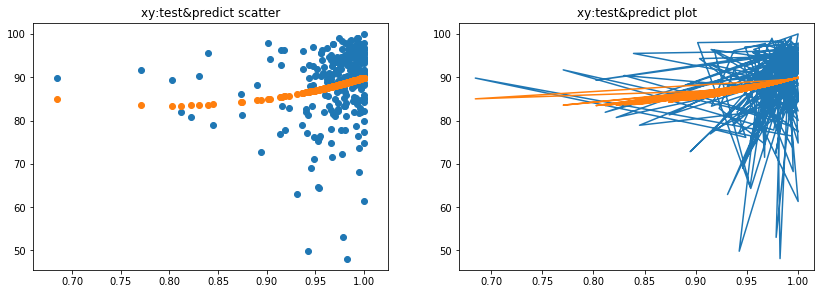

RMSE: 42.030984539602045


In [35]:
# Good graduate rate & Graduated rate
x = synthesize_data1[['% goodGrad']]
y = synthesize_data1['% Graduated']
regressions(x,y,'poly',ndegree=3,plots='xy')

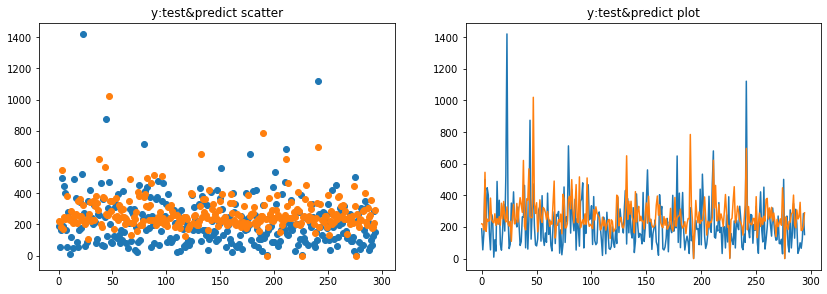

RMSE: 967.1948567327805


In [36]:
# print(plansforhsgrad_data.columns)
pfhsg_data = plansforhsgrad_data.fillna(0)
y = pd.Series(map(int,(map(lambda x:str(x).replace(',','').strip(),pfhsg_data['Total Count'] ))))
x = pfhsg_data[['4 Year Private College','4 Year Public College','2 Year Private College','2 Year Public College',
                    'Other Post Secondary', 'Apprenticeship','Work', 'Military', 'Other', 'Unknown']]
regressions(x,y,'linear')

**Conclusion for these plots:**
- no conclusion

## 2.7 Data Handling
1. for Graduated ratio -> S/T ratio & Licensed teacher  
    filter columns(GSL): **synthesize_data2**  
    normalized: **synthesize_data3**  
2. for Graduated ratio -> Total expenditure per pupil  
    filter columns(GE): **synthesize_data4**  
    normalized: **systhesize_data5**  

In [37]:
# data handling
synthesize_data2 = synthesize_data1[['% Graduated','Student / Teacher Ratio','% of Teachers Licensed in Teaching Assignment']]

# normalization
min_max_scaler = MinMaxScaler()
synthesize_data3 = min_max_scaler.fit_transform(synthesize_data2)
synthesize_data3 = pd.DataFrame(synthesize_data3,columns=['% Graduated','Student / Teacher Ratio','% of Teachers Licensed in Teaching Assignment'])
synthesize_data3.head()

,% Graduated,Student / Teacher Ratio,% of Teachers Licensed in Teaching Assignment
0,0.922118,0.641711,1.000000
1,0.934579,0.566845,1.000000
2,0.680685,0.572193,0.923077
3,0.855140,0.401070,1.000000
4,0.813084,0.561497,1.000000


In [38]:
# data handling
synthesize_data4 = synthesize_data1[['% Graduated','Total Expenditures per Pupil']]

# normalization
min_max_scaler = MinMaxScaler()
synthesize_data5 = min_max_scaler.fit_transform(synthesize_data4)
synthesize_data5 = pd.DataFrame(synthesize_data5,columns=['% Graduated','Total Expenditures per Pupil'])
synthesize_data5.head()

,% Graduated,Total Expenditures per Pupil
0,0.922118,0.231336
1,0.934579,0.254160
2,0.680685,0.201999
3,0.855140,0.273266
4,0.813084,0.278547


## 2.8 Relationship between student achievement index and education quality

### linear regression & polynomial regression & logistic regression

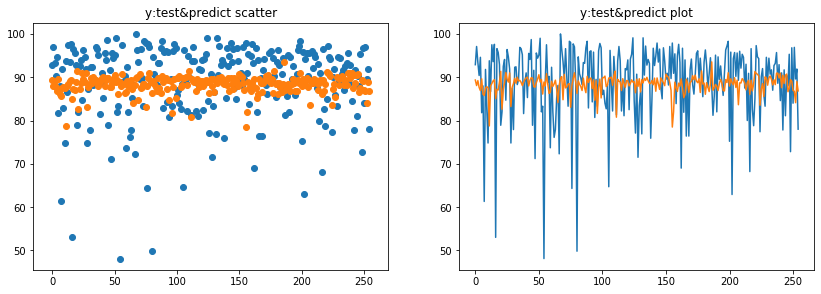

RMSE: 42.72882013300784


In [39]:
# student achievement index
SAI = synthesize_data2['% Graduated']
# education quality
EQ =  synthesize_data2[['Student / Teacher Ratio','% of Teachers Licensed in Teaching Assignment']]

regressions(EQ,SAI,'linear')

### conx artifical neuron network

In [40]:
# student achievement index
SAI = synthesize_data3['% Graduated']
# education quality
EQ =  synthesize_data3[['Student / Teacher Ratio','% of Teachers Licensed in Teaching Assignment']]
Xy = []
for i in range(len(SAI.values)):
    Xy.append((list(EQ.values[i]), [SAI.values[i]]))
Xy[:10]

[([0.6417112299465241, 1.0], [0.9221183800623054]),
 ([0.5668449197860963, 1.0], [0.9345794392523366]),
 ([0.5721925133689839, 0.9230769230769234], [0.6806853582554517]),
 ([0.4010695187165776, 1.0], [0.8551401869158879]),
 ([0.5614973262032086, 1.0], [0.8130841121495327]),
 ([0.39037433155080214, 0.9230769230769234], [0.8831775700934581]),
 ([0.4331550802139037, 1.0], [0.9345794392523366]),
 ([0.5240641711229947, 0.9679487179487181], [0.928348909657321]),
 ([0.5561497326203209, 1.0], [0.9096573208722742]),
 ([0.49732620320855625, 1.0], [0.9267912772585669])]

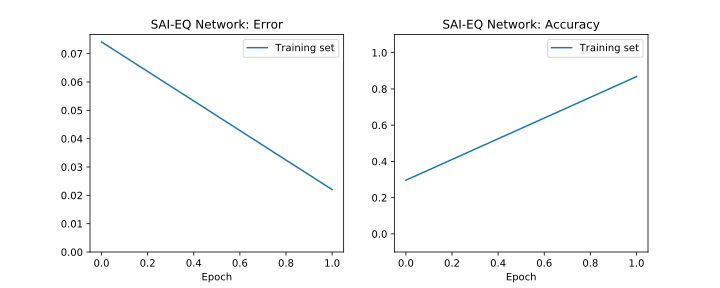

       |  Training |  Training 
Epochs |     Error |  Accuracy 
------ | --------- | --------- 
#    1 |   0.02202 |   0.86797 


In [41]:
# use conx artifical neuron network
net1 = cx.Network("SAI-EQ Network")
net1.add(cx.Layer("input", 2))
net1.add(cx.Layer("hidden", 5, activation="relu"))
net1.add(cx.Layer("output", 1, activation="sigmoid"))
net1.connect()
net1.compile(error='mean_squared_error', optimizer="sgd", lr=0.3, momentum=0.9)

net1.dataset.load(Xy)
net1.train(epochs=2000, accuracy=.75, report_rate=100, tolerance=.2, plot=True)

In [42]:
# net1.summary()
# net1.picture()
# net1.evaluate(tolerance=.2, show=True)
net1.dashboard()

Dashboard(children=(Accordion(children=(HBox(children=(VBox(children=(Select(description='Dataset:', options=(…

### Random Forest
1) graduated rate -- Student/Teacher Ratio & Licensed Teachers Ratio

In [67]:
# data
# student achievement index
SAI = synthesize_data2['% Graduated']
SAI = [int(_) for _ in SAI]
# education quality
EQ =  synthesize_data2[['Student / Teacher Ratio','% of Teachers Licensed in Teaching Assignment']]

# split train/test
X_train, X_test, y_train, y_test = train_test_split(EQ, SAI, test_size=0.33, random_state=42)

In [68]:
# model
rf_model = RandomForestClassifier(n_estimators=10, max_depth=None,min_samples_split=2, random_state=0)
rf_model.fit(X_train, y_train)
# scores = cross_val_score(rf_model, X_train, y_train)
# print(scores.mean())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

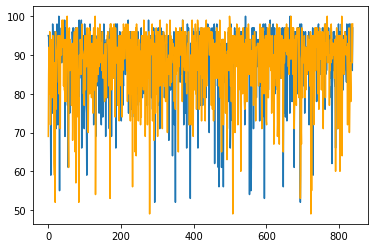

In [72]:
# predict
y_predict = rf_model.predict(X_test)
plt.plot(y_predict)
plt.plot(y_test,color="orange")

In [46]:
# customized test data
tl_min = synthesize_data2['% of Teachers Licensed in Teaching Assignment'].min()
tl_max = synthesize_data2['% of Teachers Licensed in Teaching Assignment'].max()
st_min = synthesize_data2['Student / Teacher Ratio'].min()
st_max = synthesize_data2['Student / Teacher Ratio'].max()
print("MinMax:",tl_min,tl_max,st_min,st_max)

# set test data interval
# teacher license rate
tl_test = [_ for _ in range(int(tl_min),int(tl_max)+1,2)]
# student teacher ratio
st_test = [_ for _ in range(int(st_min),int(st_max)+1,2)]
print("customized data:\n  Licensed Teachers Rate: ",tl_test,"\n  S/T Ratio: ",st_test)

# all data combinations
x_cust = list(product(st_test,tl_test))
print("glance at data(x_cust):",x_cust[-5:],"length:",len(x_cust))

MinMax: 84.4 100.0 4.5 23.2
customized data:
  Licensed Teachers Rate:  [84, 86, 88, 90, 92, 94, 96, 98, 100] 
  S/T Ratio:  [4, 6, 8, 10, 12, 14, 16, 18, 20, 22]
glance at data(x_cust): [(22, 92), (22, 94), (22, 96), (22, 98), (22, 100)] length: 90


temp_list length 11


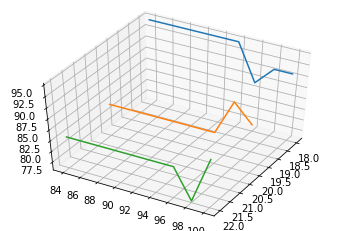

In [47]:
# predict - same Student / Teacher Ratio ->change licensed teacher Ratio

# if 84-86-88: step:9,18,...
# if 84-85-86: step:17,34,...
temp_list = [i for i in range(0,len(x_cust)+1,9)]
print("temp_list length",len(temp_list))
ax = plt.axes(projection='3d')
for i in range(len(temp_list)-1):
    # choose last 3 lines(high S/T Ratio condition)
    if i>6:
        start = temp_list[i]
        end = temp_list[i+1]
        y_cust_predict = rf_model.predict(x_cust[start:end])
        x_cust_1 = [_[0] for _ in x_cust[start:end]]
        x_cust_2 = [_[1] for _ in x_cust[start:end]]
        ax.plot3D(x_cust_1,x_cust_2,y_cust_predict)
#         ax.view_init(elev=0,azim=0)
        ax.view_init(elev=45,azim=30)

**Conclusion for this plot:**  
- no conclusion  

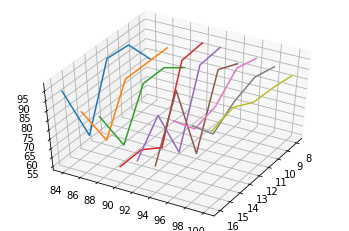

In [48]:
# predict - same licensed teacher Ratio ->change Student / Teacher Ratio
ax = plt.axes(projection='3d')
for j in tl_test[::1]:
    x_cust2 = [_ for _ in x_cust if _[1]==j and _[0]>7 and _[0]<18]
    y_cust2_predict = rf_model.predict(x_cust2)
    x_cust2_1 = [_[0] for _ in x_cust2]
    x_cust2_2 = [_[1] for _ in x_cust2]
    ax.plot3D(x_cust2_1,x_cust2_2,y_cust2_predict)
#     ax.view_init(elev=0,azim=90)
    ax.view_init(elev=45,azim=30)

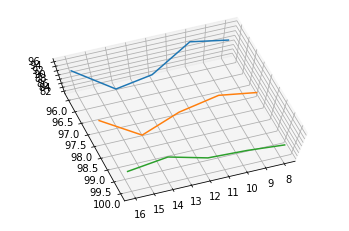

In [49]:
# specific plots - Licensed Teacher Rate > 96%
ax = plt.axes(projection='3d')
for j in tl_test[::1]:
    x_cust2 = [_ for _ in x_cust if _[1]==j and _[0]>7 and _[0]<18]
    y_cust2_predict = rf_model.predict(x_cust2)
    x_cust2_1 = [_[0] for _ in x_cust2]
    x_cust2_2 = [_[1] for _ in x_cust2]
    # licensed teacher > 96%    
    if j>95:
        ax.plot3D(x_cust2_1,x_cust2_2,y_cust2_predict)
#         ax.view_init(elev=0,azim=90)
        ax.view_init(elev=75,azim=70)

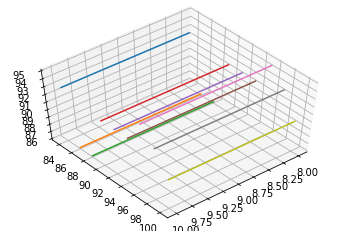

In [50]:
# specific plots - S/T Rate below 10
ax = plt.axes(projection='3d')
for j in tl_test[::1]:
    x_cust2 = [_ for _ in x_cust if _[1]==j and _[0]>7 and _[0]<11]
    y_cust2_predict = rf_model.predict(x_cust2[1:])
    x_cust2_1 = [_[0] for _ in x_cust2]
    x_cust2_2 = [_[1] for _ in x_cust2]
    ax.plot3D(x_cust2_1,x_cust2_2,y_cust2_predict)
#     ax.view_init(elev=0,azim=90)
    ax.view_init(elev=55,azim=50)

**Conclusion for this plot:**
- when Licensed teachers>96%,graduation rate keep high(Small rate fluctuation & Graduated rate higher than 80%)  
- when S/T rate<10,graduation rate keep high(Graduated rate higher than 80%)  

2) graduated rate -- Licensed Teachers Ratio

In [51]:
# data
# student achievement index
SAI = [int(_) for _ in synthesize_data2['% Graduated']]
# education quality
EQ =  np.array(synthesize_data2['% of Teachers Licensed in Teaching Assignment']).reshape(-1, 1)

# split train/test
X_train, X_test, y_train, y_test = train_test_split(EQ, SAI, test_size=0.33, random_state=42)

# model
rf_model2 = RandomForestClassifier(n_estimators=10, max_depth=None,min_samples_split=2, random_state=0)
rf_model2.fit(X_train, y_train)
scores = cross_val_score(rf_model2, X_train, y_train)
print(scores.mean())

E:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


0.06880288373676141


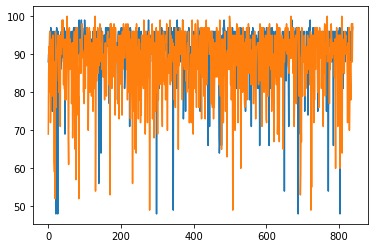

In [52]:
# predict
y_predict = rf_model2.predict(X_test)
plt.plot(y_predict)
plt.plot(y_test)

MinMax: 84.4 100.0
customized data: [array([84]), array([85]), array([86]), array([87]), array([88]), array([89]), array([90]), array([91]), array([92]), array([93]), array([94]), array([95]), array([96]), array([97]), array([98]), array([99]), array([100])]


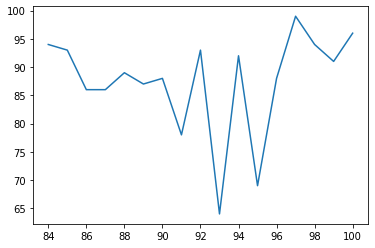

In [53]:
# customized test data
tl_min2 = synthesize_data2['% of Teachers Licensed in Teaching Assignment'].min()
tl_max2 = synthesize_data2['% of Teachers Licensed in Teaching Assignment'].max()
print("MinMax:",tl_min2,tl_max2)

# set test data interval
tl_test2 = np.array([_ for _ in range(int(tl_min2),int(tl_max2)+1)]).reshape(-1, 1)
tl_test2a = [_ for _ in tl_test2 if _ > 80]
print("customized data:",list(tl_test2a))

# predict
y_cust2_predict2 = rf_model2.predict(tl_test2a)

# plot
plt.plot(tl_test2a,y_cust2_predict2)

**Conclusions:**
- it proves again that graduated rate keep high when licensed teachers are above 96%

## 2.9 Relationship between student achievement index and ExpenditurePerPupil

### linear regression & non-linear regression & polynomial regression

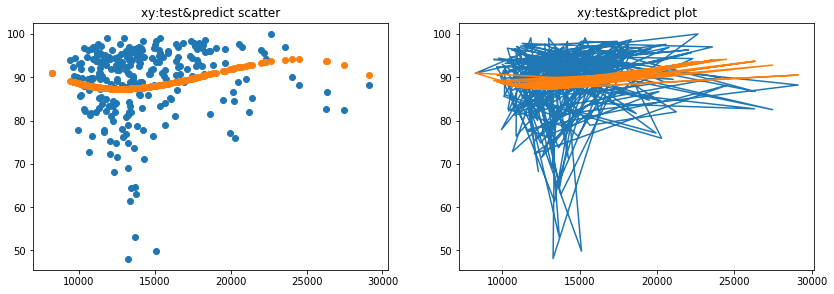

RMSE: 42.67898685463573


In [54]:
# student achievement index
SAI = synthesize_data4['% Graduated']
# investment per student
IPS = synthesize_data4[['Total Expenditures per Pupil']]

regressions(IPS,SAI,'poly',ndegree=3,plots='xy')

### Keras Neuron Network - Regression 

In [55]:
# build model
def build_model(optimizer):
    model = keras.Sequential()
    
    model.add(layers.Dense(1, activation=tf.nn.relu, input_dim=1))
    model.add(layers.Dense(32, activation=tf.nn.relu))
    model.add(layers.Dense(32, activation=tf.nn.relu))
    model.add(layers.Dense(32, activation=tf.nn.relu))
    model.add(layers.Dense(1, activation=tf.nn.relu))
    
    model.summary()
    if optimizer=='adam':
        optimizer='adam'
    elif optimizer=='RMS':
        optimizer = tf.compat.v1.train.RMSPropOptimizer(0.001)
    model.compile(optimizer=optimizer, loss='mse',metrics=['mae'])
    return model

# plot history
def plot_history(history):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [1000$]')
    plt.plot(history.epoch, np.array(history.history['mae']),label='Train Loss')
    plt.plot(history.epoch, np.array(history.history['val_mae']),label = 'Val loss')
    plt.legend()
    plt.ylim([0, 5])
    
# print dot
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')
        
# early stop
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

In [56]:
# Data
# student achievement index
SAI = synthesize_data4['% Graduated']
# investment per student
IPS = np.array(synthesize_data4['Total Expenditures per Pupil']).reshape(-1, 1)

corr('all',SAI,IPS)

  Spearman correlation coefficient: 0.161
      Samples are correlated (reject H0) p=0.000
  Kendalltau correlation coefficient: 0.105
      Samples are correlated (reject H0) p=0.000


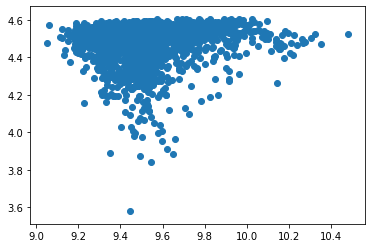

In [57]:
# data processing: log

SAI = list(map(lambda x:math.log(x)if x!=0 else 0, SAI))
IPS = list(map(lambda x:math.log(x)if x!=0 else 0, IPS))
X_train, X_test, y_train, y_test = train_test_split(IPS, SAI, test_size=0.33, random_state=42)

train_data = np.array(X_train)
test_data = np.array(X_test)
train_labels = np.array(y_train)
test_labels = np.array(y_test)
# train_data,test_data,train_labels,test_labels
plt.scatter(train_data,train_labels)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                64        
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 2,211
Trainable params: 2,211
Non-trainable params: 0
_________________________________________________________________
Testing set Mean Abs Error: $4473.98


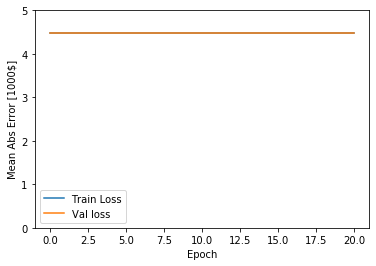

In [58]:
# start from here
model = build_model('RMS')

# history -> plot
# hist = model.fit(train_data, train_labels, epochs= 500,validation_split=0.2, verbose=0,callbacks=[early_stop, PrintDot()])
hist = model.fit(train_data, train_labels, epochs= 500,validation_split=0.2, verbose=0,callbacks=[early_stop])
plot_history(hist)

# evaluate -> mae
[loss, mae] = model.evaluate(test_data, test_labels, verbose=0)
print("Testing set Mean Abs Error: ${:7.2f}".format(mae * 1000))

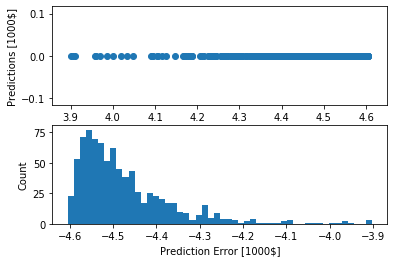

In [59]:
# predict
test_predictions = model.predict(test_data).flatten()  

# plot result & error
plt.subplot(2,1,1)
plt.scatter(test_labels, test_predictions)  
plt.xlabel('True Values [1000$]')  
plt.ylabel('Predictions [1000$]')  
plt.axis('equal')  
plt.xlim(plt.xlim())  
plt.ylim(plt.ylim())  
_ = plt.plot([-100, 100], [-100, 100])  

plt.subplot(2,1,2)
error = test_predictions - test_labels  
plt.hist(error, bins = 50)  
plt.xlabel("Prediction Error [1000$]")  
_ = plt.ylabel("Count") 

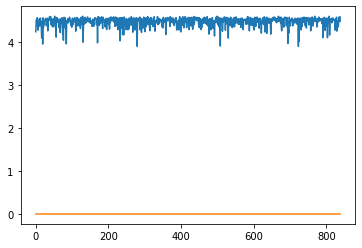

In [60]:
plt.plot(test_labels)
plt.plot(test_predictions)

### Random forest

In [61]:
# Data
# student achievement index
SAI = synthesize_data4['% Graduated']
SAI = [int(_) for _ in SAI]
# investment per student
IPS = np.array(synthesize_data4['Total Expenditures per Pupil']).reshape(-1, 1)

# split train/test
X_train, X_test, y_train, y_test = train_test_split(IPS, SAI, test_size=0.33, random_state=42)

In [62]:
clf2 = RandomForestClassifier(n_estimators=10, max_depth=None,min_samples_split=2, random_state=0)
clf2.fit(X_train, y_train)
scores2 = cross_val_score(clf2, X_train, y_train)
print(scores2.mean())

E:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


0.05512471564858429


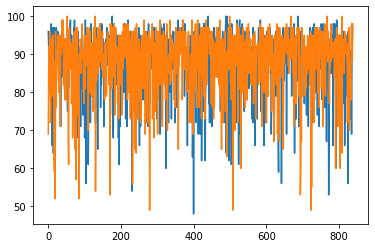

In [63]:
y_predict = clf2.predict(X_test)
plt.plot(y_predict)
plt.plot(y_test)

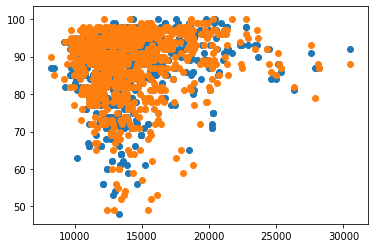

In [64]:
plt.scatter([float(i) for i in X_test],y_predict)
plt.scatter([float(i) for i in X_test],y_test)

MinMax: 35.8 100.0 8242.66 35609.08
customized data: [8242, 13242, 18242, 23242]


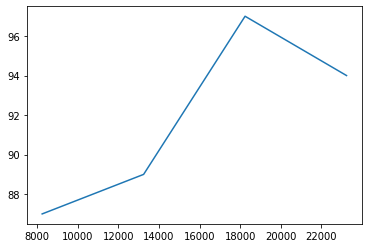

In [65]:
# customized test data
gr_min = synthesize_data4['% Graduated'].min()
gr_max = synthesize_data4['% Graduated'].max()
ep_min = synthesize_data4['Total Expenditures per Pupil'].min()
ep_max = synthesize_data4['Total Expenditures per Pupil'].max()
print("MinMax:",gr_min,gr_max,ep_min,ep_max)

# set test data interval
# delete extra large data by -10000
ep_test = [_ for _ in range(int(ep_min),int(ep_max-10000)+1,5000)]
print("customized data:",ep_test)

# predict plot
y_ep_predict = clf2.predict(np.array(ep_test).reshape(-1,1))
plt.plot(ep_test,y_ep_predict)

**Conclusions:**
- break point 1: 12500~13000
    * National education investment break point(more investment => invalid)
    * MA line slope becomes larger, which means it's still effective to keep investing
- break point 2: 18000~18500
    * MA line slope start to fall after 18000~18500, which means it's invalid to keep investing.
- These 2 conlcusions prove that MA has a high efficiency of education investment